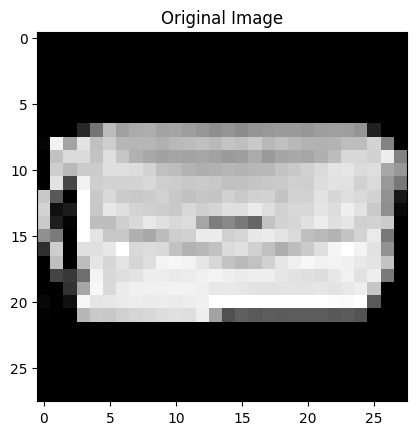

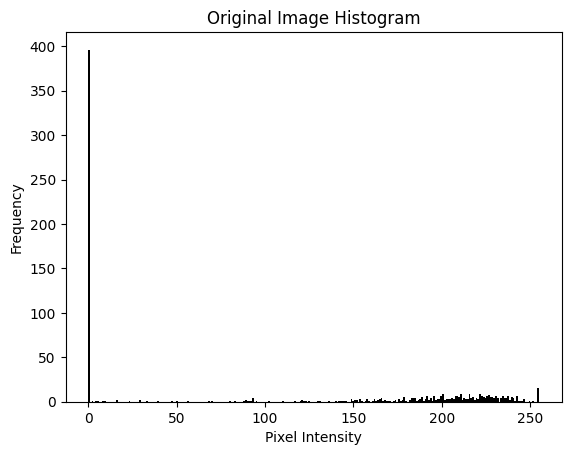

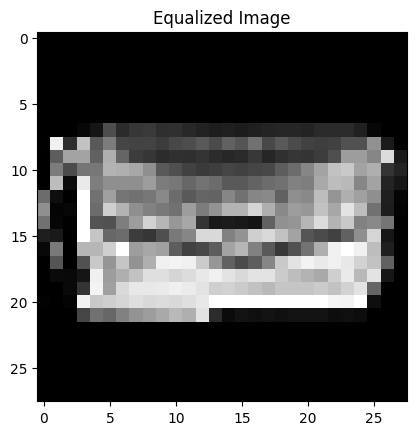

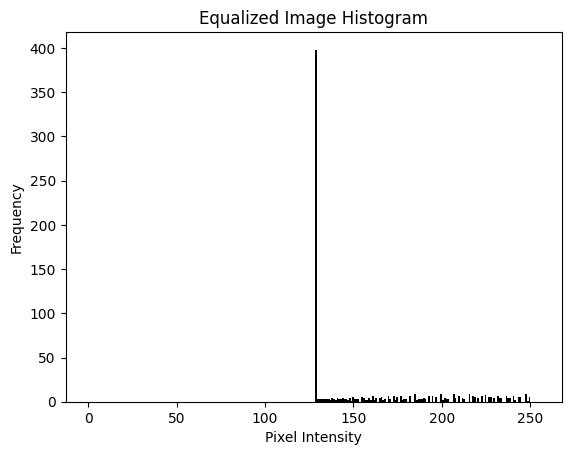

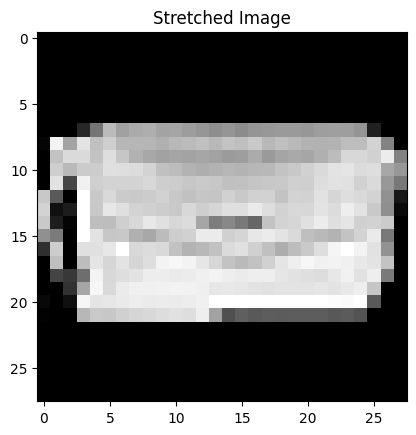

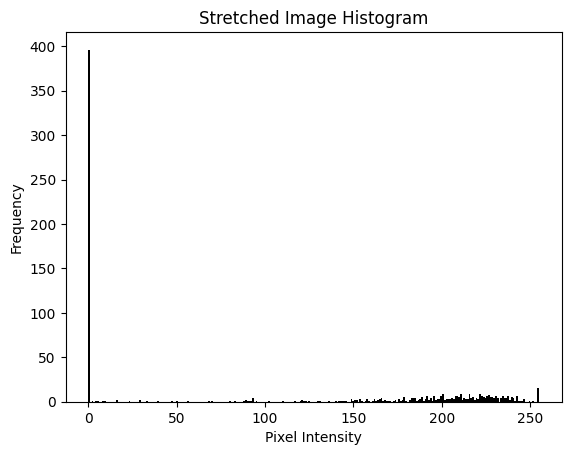

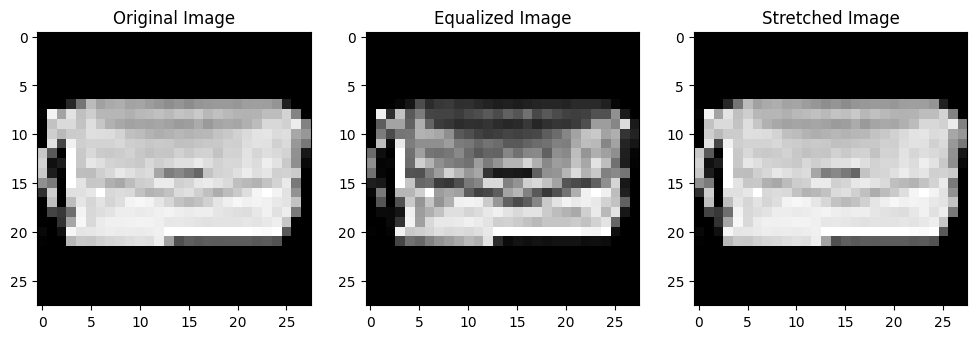

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

image_index = np.random.randint(0, test.shape[0])
original_image = test.iloc[image_index, 1:].values.reshape(28, 28).astype(np.uint8)

def plot_histogram(image, title):
    plt.hist(image.flatten(), bins=256, range=[0, 255], color='black')
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

def histogram_equalization(image):
    hist, _ = np.histogram(image.flatten(), bins=256, range=[0, 255])
    pmf = hist / np.sum(hist)
    cdf = np.cumsum(pmf)
    equalized_image = np.interp(image.flatten(), np.arange(0, 256), cdf * 255)
    equalized_image = equalized_image.reshape(image.shape)
    return equalized_image

def histogram_stretching(image):
    rmin, rmax = np.min(image), np.max(image)
    smin, smax = 0, 255
    stretched_image = ((image - rmin) / (rmax - rmin)) * (smax - smin) + smin
    return stretched_image

plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.show()

plot_histogram(original_image, "Original Image Histogram")

equalized_image = histogram_equalization(original_image)

plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.show()

plot_histogram(equalized_image, "Equalized Image Histogram")

stretched_image = histogram_stretching(original_image)

plt.imshow(stretched_image, cmap='gray')
plt.title("Stretched Image")
plt.show()

plot_histogram(stretched_image, "Stretched Image Histogram")

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.subplot(1, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.subplot(1, 3, 3)
plt.imshow(stretched_image, cmap='gray')
plt.title("Stretched Image")
plt.show()
